<a href="https://colab.research.google.com/github/bloyal/Deep-Learning-with-Python/blob/main/Deep_Learning_with_Python_chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0     

In [ ]:
# Traing the convnet on MNIST images

from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#reshape the images
train_images = train_images.reshape((60000, 28,28,1))
#convert from int to float and normalize
train_images = train_images.astype("float32") / 255

#repeat for test images
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

#compile model
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#fit model
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
938/938 [==============================] - 48s 50ms/step - loss: 0.8425 - accuracy: 0.7274
Epoch 2/5
938/938 [==============================] - 48s 51ms/step - loss: 0.2438 - accuracy: 0.9250
Epoch 3/5
938/938 [==============================] - 47s 50ms/step - loss: 0.1275 - accuracy: 0.9607
Epoch 4/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0918 - accuracy: 0.9721
Epoch 5/5
938/938 [==============================] - 47s 51ms/step - loss: 0.0728 - accuracy: 0.9771


In [ ]:
# Evaluate on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.0558 - accuracy: 0.9817


In [ ]:
print(f"Test accuracy: {test_acc:.3f}")

Test accuracy: 0.982


In [ ]:
# Listing 8.5 Creating a humungous CV model without any max pooling
inputs = keras.Input(shape=(28,28,1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 61952)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                619530    
Total params: 712,202
Trainable params: 712,202
Non-trainable params: 0
_____________________________________________________

## 8.2 Train a convet from scratch on a small dataset

In [7]:
# Upload dogs-vs-cats data
from google.colab import files
files.upload()

Saving cats_vs_dogs_small.zip to cats_vs_dogs_small.zip


In [9]:
!unzip -qq cats_vs_dogs_small.zip

replace cats_vs_dogs_small/test/cat/cat.1577.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/cats_vs_dogs_small/test/cat/._cat.1577.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [10]:
#8.2.3 Building your model
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 41, 41, 128)       7385

In [12]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [13]:
!pwd

/content


In [14]:
# 8.2.4 Data preprocessing
#Notes: Had to correct parameter name
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory="cats_vs_dogs_small/train",
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    directory="cats_vs_dogs_small/validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    directory="cats_vs_dogs_small/test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [15]:
# Listing 8.14
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [16]:
# Lishting 8.15 Fitting the model using a Dataset
callbacks = [
             keras.callbacks.ModelCheckpoint(
                 filepath="convnet_from_scratch.keras",
                 save_best_only=True,
                 monitor="val_loss"
             )
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 39s 102ms/step - loss: 0.7884 - accuracy: 0.5075 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 6s 92ms/step - loss: 0.7093 - accuracy: 0.5230 - val_loss: 0.6788 - val_accuracy: 0.6300
Epoch 3/30
63/63 [==============================] - 6s 89ms/step - loss: 0.7331 - accuracy: 0.6100 - val_loss: 0.6651 - val_accuracy: 0.5890
Epoch 4/30
63/63 [==============================] - 6s 91ms/step - loss: 0.6642 - accuracy: 0.6370 - val_loss: 0.6337 - val_accuracy: 0.6290
Epoch 5/30
63/63 [==============================] - 6s 89ms/step - loss: 0.6121 - accuracy: 0.6845 - val_loss: 0.6090 - val_accuracy: 0.6640
Epoch 6/30
63/63 [==============================] - 6s 87ms/step - loss: 0.5903 - accuracy: 0.6760 - val_loss: 0.6670 - val_accuracy: 0.6080
Epoch 7/30
63/63 [==============================] - 6s 89ms/step - loss: 0.5574 - accuracy: 0.7255 - val_loss: 0.6062 - val_accuracy: 0.6640
Epoch 8/30


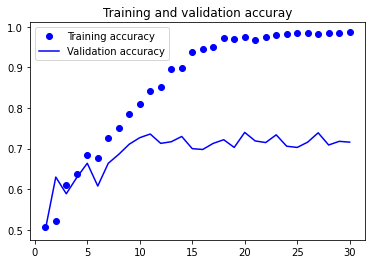

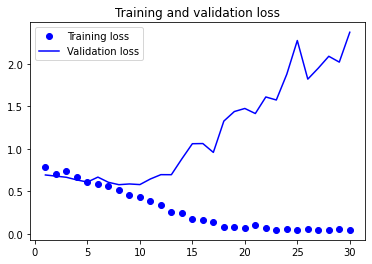

In [17]:
#8.16 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuray")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [18]:
#Listing 8.17 Evaluating the model on the test set

test_model = keras.models.load_model('convnet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

63/63 [==============================] - 3s 47ms/step - loss: 0.5916 - accuracy: 0.7075
Test accuracy: 0.707


In [19]:
#Listing 8.18 Define a data augmentation stage
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

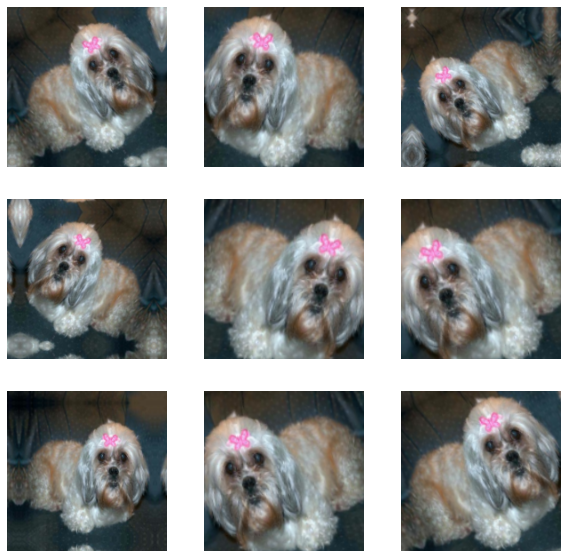

In [20]:
#Listing 8.19 Display from randomly augmented training images
plt.figure(figsize=(10,10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [21]:
#Listing 8.20 Defining a new convnet that includes image aug

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [22]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 43, 43, 64)        0   

In [23]:
callbacks =[
            keras.callbacks.ModelCheckpoint(
                filepath="conv_from_scratch_with_aug.keras",
                save_best_only=True,
                monitor="val_loss"
            )
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100
63/63 [==============================] - 7s 96ms/step - loss: 0.7286 - accuracy: 0.4925 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 6s 91ms/step - loss: 0.6996 - accuracy: 0.5180 - val_loss: 0.6850 - val_accuracy: 0.5910
Epoch 3/100
63/63 [==============================] - 6s 92ms/step - loss: 0.6934 - accuracy: 0.5690 - val_loss: 0.6738 - val_accuracy: 0.6020
Epoch 4/100
63/63 [==============================] - 6s 90ms/step - loss: 0.6562 - accuracy: 0.6235 - val_loss: 0.7283 - val_accuracy: 0.5520
Epoch 5/100
63/63 [==============================] - 6s 88ms/step - loss: 0.6553 - accuracy: 0.6235 - val_loss: 0.6282 - val_accuracy: 0.6430
Epoch 6/100
63/63 [==============================] - 6s 88ms/step - loss: 0.6181 - accuracy: 0.6520 - val_loss: 0.6905 - val_accuracy: 0.6210
Epoch 7/100
63/63 [==============================] - 6s 87ms/step - loss: 0.6052 - accuracy: 0.6700 - val_loss: 0.6247 - val_accuracy: 0.6280
Epoch 

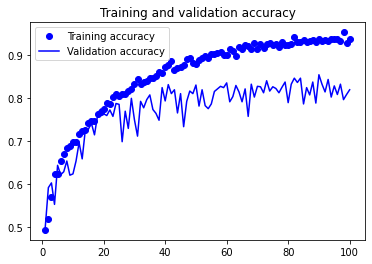

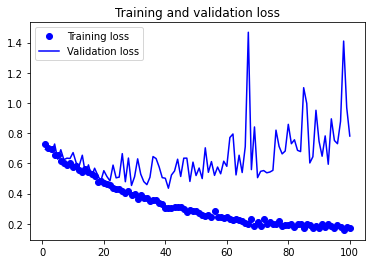

In [24]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [27]:
test_model = keras.models.load_model(
    "conv_from_scratch_with_aug.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 48ms/step - loss: 0.4786 - accuracy: 0.8060
Test accuracy: 0.806


### 8.3 Leveraging a pretrained model

In [28]:
# Listing 8.23 Instantiating the VGG16 convolutional base
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180,180,3)
)

58892288/58889256 [==============================] - 0s 0us/step


In [29]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

### Fast feature extraction without data augmentation

In [30]:
# Listing 8.24 Extracting the VGG16 features and corresponding labels

import numpy as np

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [31]:
train_features.shape

(2000, 5, 5, 512)

In [32]:
# Listing 8.25 Defining and training the densely connected classifier

inputs = keras.Input(shape=(5,5,512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
             keras.callbacks.ModelCheckpoint(
                 filepath="feature_extraction.keras",
                 save_best_only=True,
                 monitor="val_loss"
             )
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 13.5786 - accuracy: 0.9230 - val_loss: 8.0694 - val_accuracy: 0.9640
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 3.0798 - accuracy: 0.9760 - val_loss: 5.3476 - val_accuracy: 0.9710
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0774 - accuracy: 0.9900 - val_loss: 7.3041 - val_accuracy: 0.9670
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 2.0979 - accuracy: 0.9820 - val_loss: 6.7728 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.7183 - accuracy: 0.9930 - val_loss: 5.1545 - val_accuracy: 0.9790
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8094 - accuracy: 0.9955 - val_loss: 6.4220 - val_accuracy: 0.9650
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.4774 - accuracy: 0.9950 - val_loss: 6.3777 - val_accuracy: 0.9680
Epoch 8/20
63/63 [=

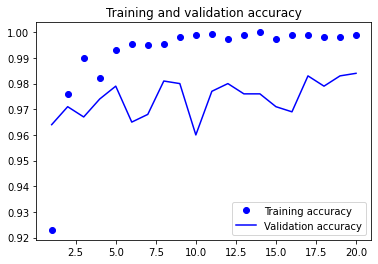

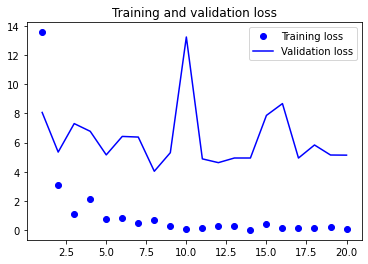

In [33]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Feature extraction WITH data augmentation

In [34]:
# Listing 8.27 Instantiate and freeze the VGG16 convolutional base
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False
)
conv_base.trainable = False

In [35]:
# Listing 8.28 Print the list of trainable weights before and after freezing
conv_base.trainable = True
print("This is the number of trainable weights "
          "before freezing the conv base:", len(conv_base.trainable_weights))
conv_base.trainable = False
print("This is the number of trainable weights "
          "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


In [36]:
# 8.29 Adding data aug and a densely-connected classifier to the frozen convolutional base
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [37]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               3277056   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257 

In [38]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 12s 176ms/step - loss: 31.5755 - accuracy: 0.8480 - val_loss: 8.4185 - val_accuracy: 0.9460
Epoch 2/50
63/63 [==============================] - 11s 170ms/step - loss: 11.3762 - accuracy: 0.9175 - val_loss: 6.3879 - val_accuracy: 0.9510
Epoch 3/50
63/63 [==============================] - 11s 174ms/step - loss: 12.5922 - accuracy: 0.9115 - val_loss: 7.1581 - val_accuracy: 0.9550
Epoch 4/50
63/63 [==============================] - 11s 173ms/step - loss: 7.9319 - accuracy: 0.9375 - val_loss: 14.0766 - val_accuracy: 0.9260
Epoch 5/50
63/63 [==============================] - 11s 177ms/step - loss: 8.7877 - accuracy: 0.9245 - val_loss: 6.6221 - val_accuracy: 0.9520
Epoch 6/50
63/63 [==============================] - 11s 177ms/step - loss: 6.2148 - accuracy: 0.9400 - val_loss: 6.5356 - val_accuracy: 0.9470
Epoch 7/50
63/63 [==============================] - 11s 175ms/step - loss: 7.1468 - accuracy: 0.9355 - val_loss: 5.7597 - val_accuracy: 0.

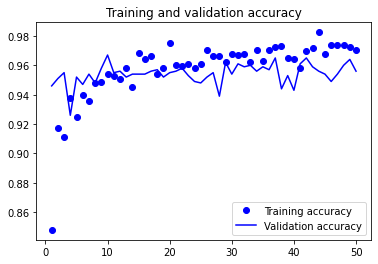

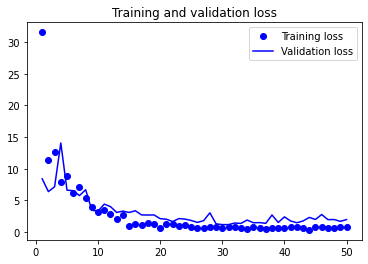

In [39]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [40]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 116ms/step - loss: 1.1694 - accuracy: 0.9665
Test accuracy: 0.966


### Fine-tuning a pretrained model

In [41]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [45]:
# Listing 8.31 Freezing all layers until the 5th block
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [46]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [47]:
# Listing 8.32 Fine tuning the model with a low learning rate to avoid screwing
# up the existing representations in the top layers

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 14s 201ms/step - loss: 0.4932 - accuracy: 0.9780 - val_loss: 2.4811 - val_accuracy: 0.9470
Epoch 2/30
63/63 [==============================] - 13s 201ms/step - loss: 0.5504 - accuracy: 0.9740 - val_loss: 1.8130 - val_accuracy: 0.9560
Epoch 3/30
63/63 [==============================] - 13s 202ms/step - loss: 0.3636 - accuracy: 0.9775 - val_loss: 2.5013 - val_accuracy: 0.9520
Epoch 4/30
63/63 [==============================] - 13s 200ms/step - loss: 0.2787 - accuracy: 0.9850 - val_loss: 1.7596 - val_accuracy: 0.9560
Epoch 5/30
63/63 [==============================] - 13s 199ms/step - loss: 0.3134 - accuracy: 0.9810 - val_loss: 1.5633 - val_accuracy: 0.9550
Epoch 6/30
63/63 [==============================] - 13s 198ms/step - loss: 0.3767 - accuracy: 0.9825 - val_loss: 2.1833 - val_accuracy: 0.9540
Epoch 7/30
63/63 [==============================] - 13s 198ms/step - loss: 0.3037 - accuracy: 0.9790 - val_loss: 2.1196 - val_accuracy: 0.9550

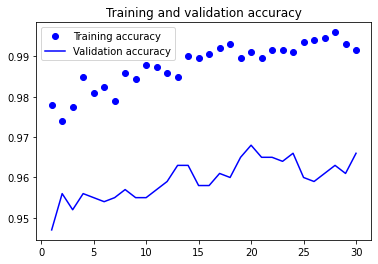

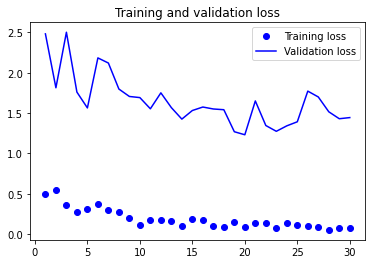

In [48]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [49]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 114ms/step - loss: 1.2799 - accuracy: 0.9680
Test accuracy: 0.968
